# Data Science and Business Analytics (The Sparks Foundation July'21)

TASK 1: PREDICTION USING SUPERVISED ML

AUTHOR : VARUN SAMPATH KUMAR

To predict the percentage of marks of student is expected to score based on the number of hours they studied

# Importing Libraries

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

%matplotlib inline

# Loading Dataset

In [97]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data=pd.read_csv(url)
print("Data Imported Successfully")

#loading the first 5 records of the dataset
data.head()

Data Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data Exploration

In [98]:
#Getting the information of the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [99]:
#checking for Total null values column wise
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [100]:
#complete Discription of the datset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [101]:
#data.shape gives no of rows and columns of the dataset
data.shape

(25, 2)

In [102]:
#data types of the records
data.dtypes

Hours     float64
Scores      int64
dtype: object

# Visualization 

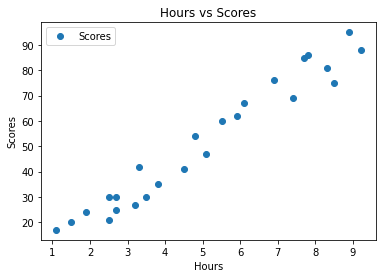

In [103]:
#plots Hours vs Scores
data.plot(x="Hours",y="Scores",style='o')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores")
plt.show()

array([[<AxesSubplot:title={'center':'Hours'}>,
        <AxesSubplot:title={'center':'Scores'}>]], dtype=object)

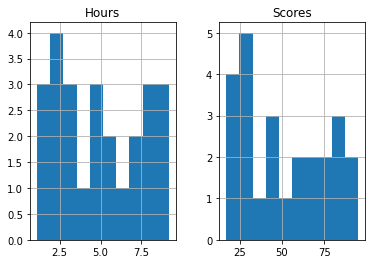

In [104]:
#histogram graph of the dataset
data.hist()

# Correlation

In [105]:
#getting the correlation of the columns using corr()
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

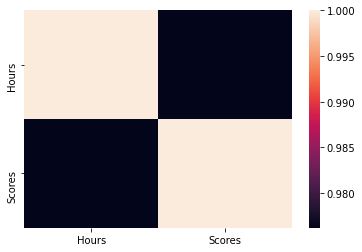

In [106]:
#visualizing the correlation
sns.heatmap(data.corr(),fmt=".0%")

# Data Processing

In [107]:
#splitting the data into independent features of dataset

X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values

In [108]:
#splitting the data from test and train

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

# Training the Model

In [109]:
linear = LinearRegression()
linear.fit(x_train,y_train)
print("Training Completed")

Training Completed


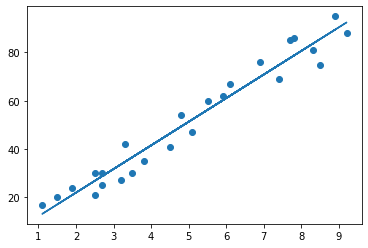

In [110]:
#plotting the regression Line
line=linear.coef_*X+linear.intercept_

#plot for test data
plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

In [117]:
print(x_test) #training data
y_pred=linear.predict(x_test)  #predicting scores for corresponding training data

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [116]:
#Comparing Actual vs Predicted
df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


# Model Accuracy

In [118]:
#Calculating the accuracy of the model
print("Model Accuracy:",linear.score(X,Y))

Model Accuracy: 0.9529426789332803


In [119]:
#Calculating the mean absolute error
print("Mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))

Mean absolute error: 4.419727808027652


# Testing for random input

In [121]:
hours = 9.25
pred=linear.predict([[hours]])
print("No of Hours:",hours)
print("Predicted Score:",pred[0])

No of Hours: 9.25
Predicted Score: 92.91505723477056
